In [30]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

import re
import unidecode
from wordcloud import WordCloud, STOPWORDS

In [32]:
df = pd.read_csv('TRABAJOPOLIS_FEB2019.csv',encoding='latin-1', sep=",")

In [33]:
df

,Nombre_Empresa,Id_Empleo,Ciudad,Categoria,Sueldo,Publicado,Vencimiento,Descripcion,Nombre_cargo,Enlace
0,Empresa de Servicios a Nivel Nacional,717052,"Sucre, Bolivia","Administración y Oficina,Dirección y Gerencia",No Declarado,05 Febrero 2019,07 Marzo 2019,importante empresa comercial busca incorporar ...,Coordinador(a) de Sucursal - Sucre,https://www.trabajopolis.bo/oferta-de-trabajo-...
1,Digital Tv Cable,717036,"Santa Cruz de la Sierra, Bolivia","Administración y Oficina,Atención al Cliente",Dependiendo de la Experiencia,05 Febrero 2019,07 Marzo 2019,digital tv cable internet esta buscando talen...,COORDINADOR (A) DE CALL CENTER Y ATC,https://www.trabajopolis.bo/oferta-de-trabajo-...
2,Electro Hogar S.R.L.,717026,"Santa Cruz de la Sierra, Bolivia",Administración y Oficina,De Bs. 2.060 a Bs. 2.999,05 Febrero 2019,07 Marzo 2019,secretaria recepcionista formacion conocimien...,Secretaria Recepcionista,https://www.trabajopolis.bo/oferta-de-trabajo-...
3,Cooperativa de Ahorro y Crédito Abierta Jesús ...,717041,"Sucre, Bolivia",Administración y Oficina,No Declarado,05 Febrero 2019,07 Marzo 2019,ejecutivo de negociosede chuquisacaformacionfo...,Ejecutivo(a) de Negocio - Chuquisaca,https://www.trabajopolis.bo/oferta-de-trabajo-...
4,Canedo Strampfer Consultores SRL,716469,"Cochabamba, Bolivia",Arquitectura,Negociable,05 Febrero 2019,07 Marzo 2019,arquitectofunciones elaboracion de planos calc...,Arquitecto(a),https://www.trabajopolis.bo/oferta-de-trabajo-...
5,AutoStar,698995,"La Paz, Bolivia",Administración y Oficina,No Declarado,05 Febrero 2019,07 Marzo 2019,autostar desea incorporar a su equipo de traba...,Asistente Administrativo(a),https://www.trabajopolis.bo/oferta-de-trabajo-...
6,PERTEC S.R.L.,717011,"Santa Cruz de la Sierra, Bolivia",Atención al Cliente,No Declarado,05 Febrero 2019,07 Marzo 2019,pertec srlempresa lider en la comercializacion...,Administrador(a) de Tiendas - Santa Cruz,https://www.trabajopolis.bo/oferta-de-trabajo-...
7,Importante Empresa,717002,"Santa Cruz de la Sierra, Bolivia",Administración y Oficina,No Declarado,05 Febrero 2019,07 Marzo 2019,importante empresa requiere incorporar a su eq...,Operador de Grúa y Pala Cargadora,https://www.trabajopolis.bo/oferta-de-trabajo-...
8,Importante Empresa Comercial,716821,"Santa Cruz de la Sierra, Bolivia",Contabilidad y Economía,No Declarado,05 Febrero 2019,06 Marzo 2019,importante empresa del rubro comercial busca i...,Auxiliar Contable - Santa Cruz,https://www.trabajopolis.bo/oferta-de-trabajo-...
9,Importante Empresa Comercial,702806,"La Paz, Bolivia",Contabilidad y Economía,No Declarado,05 Febrero 2019,07 Marzo 2019,importante empresa comercial requiere incorpor...,Analista Contable,https://www.trabajopolis.bo/oferta-de-trabajo-...


In [35]:
df.Id_Empleo.unique().shape

(2044,)

In [36]:
df_new = df.drop_duplicates(subset ="Id_Empleo") 

In [37]:
df_new.set_index('Id_Empleo', verify_integrity = True, inplace = True)

In [38]:
df_new['Publicado'].value_counts()

11 Enero 2019      67
08 Enero 2019      60
04 Febrero 2019    60
18 Enero 2019      56
17 Enero 2019      53
24 Enero 2019      50
15 Enero 2019      50
07 Enero 2019      50
01 Febrero 2019    49
25 Enero 2019      49
28 Enero 2019      48
29 Enero 2019      48
13 Marzo 2019      48
14 Febrero 2019    46
10 Enero 2019      46
30 Enero 2019      45
13 Febrero 2019    45
15 Marzo 2019      42
14 Enero 2019      41
23 Enero 2019      41
08 Febrero 2019    41
14 Marzo 2019      39
12 Marzo 2019      39
25 Febrero 2019    38
11 Febrero 2019    37
07 Marzo 2019      36
12 Febrero 2019    36
09 Enero 2019      35
31 Enero 2019      34
21 Enero 2019      34
                   ..
07 Febrero 2019    30
02 Febrero 2019    30
06 Febrero 2019    28
05 Febrero 2019    28
01 Marzo 2019      28
06 Marzo 2019      28
22 Febrero 2019    27
11 Marzo 2019      27
28 Febrero 2019    27
20 Febrero 2019    26
12 Enero 2019      26
23 Febrero 2019    26
26 Febrero 2019    26
08 Marzo 2019      25
21 Febrero

In [39]:
df_new['Sueldo'].value_counts()

No Declarado                      1604
De Bs. 2.060 a Bs. 2.999           109
De Bs. 3.000 a Bs. 3.999            94
Dependiendo de la Experiencia       90
Negociable                          67
De Bs. 4.000 a Bs. 4.999            30
De Bs. 5.000 a Bs. 5.999            15
De Bs. 6.000 a Bs. 6.999            10
De Bs. 8.000 a Bs. 8.999             8
De Bs. 7.000 a Bs. 7.999             8
De Bs. 10.000 a Bs. 14.999           4
De Bs. 9.000 a Bs. 9.999             2
Mayores a Bs. 20.000                 2
De Bs. 15.000 a Bs. 19.999           1
Name: Sueldo, dtype: int64

In [40]:
df_new['Nombre_Empresa'].value_counts().head(10)

Importante Empresa                          70
Banco Pyme Ecofuturo S.A.                   49
INSTITUCION DE INTERMEDIACION FINANCIERA    45
Banco Fassil - Trabaje con Nosotros         44
Importante Empresa Comercial                34
Empresa Comercial                           31
Centro de Enseñanza Tecnológica             28
Univida S.A.                                26
INDUSTRIAS FERROTODO LTDA.                  26
Grupo Nacional Vida                         25
Name: Nombre_Empresa, dtype: int64

In [41]:
df_new['Ciudad'].value_counts()

Santa Cruz de la Sierra, Bolivia    1189
La Paz, Bolivia                      447
Cochabamba, Bolivia                  241
Tarija, Bolivia                       42
El Alto, Bolivia                      29
Sucre, Bolivia                        26
Oruro, Bolivia                        24
Potosí, Bolivia                       17
Trinidad, Bolivia                     13
PotosÃ­, Bolivia                      10
Otra Ciudad de Bolivia, Bolivia        5
Cobija, Bolivia                        1
Name: Ciudad, dtype: int64

In [42]:
def column2text(feature):
    new_list = []
    # Separate by colon
    for element in feature:
        if ',' in element:
            tmp = element.split(',')
            new_list.append(tmp[0].rstrip())
            new_list.append(tmp[1].rstrip())
        #else:
         #   new_categorias.append(element)
    # Merge all elements of list into a text        
    txt = ''
    for element in new_list:
        txt = txt + element + ' '
    # Clean text
    text = txt.lower().replace('\n','') #Get items without \n
    text = re.sub("(\(\w+\))", '', text) #Delete parenthesis
    #text = unidecode.unidecode(text) #Delete accents
    #text = re.sub('[^A-Za-z0-9\s]','',text) #Delete anything but letters, numbers and spaces
    clean_text = text.replace('  ', ' ')
    return clean_text

In [43]:
df_new['Nombre_cargo'].value_counts().head()

Auxiliar Contable                      32
Ejecutivo(a) de Ventas                 29
Ejecutivo(a) de Ventas - La Paz        16
Ejecutivo(a) de Ventas - Santa Cruz    15
Contador(a) General                    12
Name: Nombre_cargo, dtype: int64

In [44]:
clean_text = column2text(df_new['Categoria'])

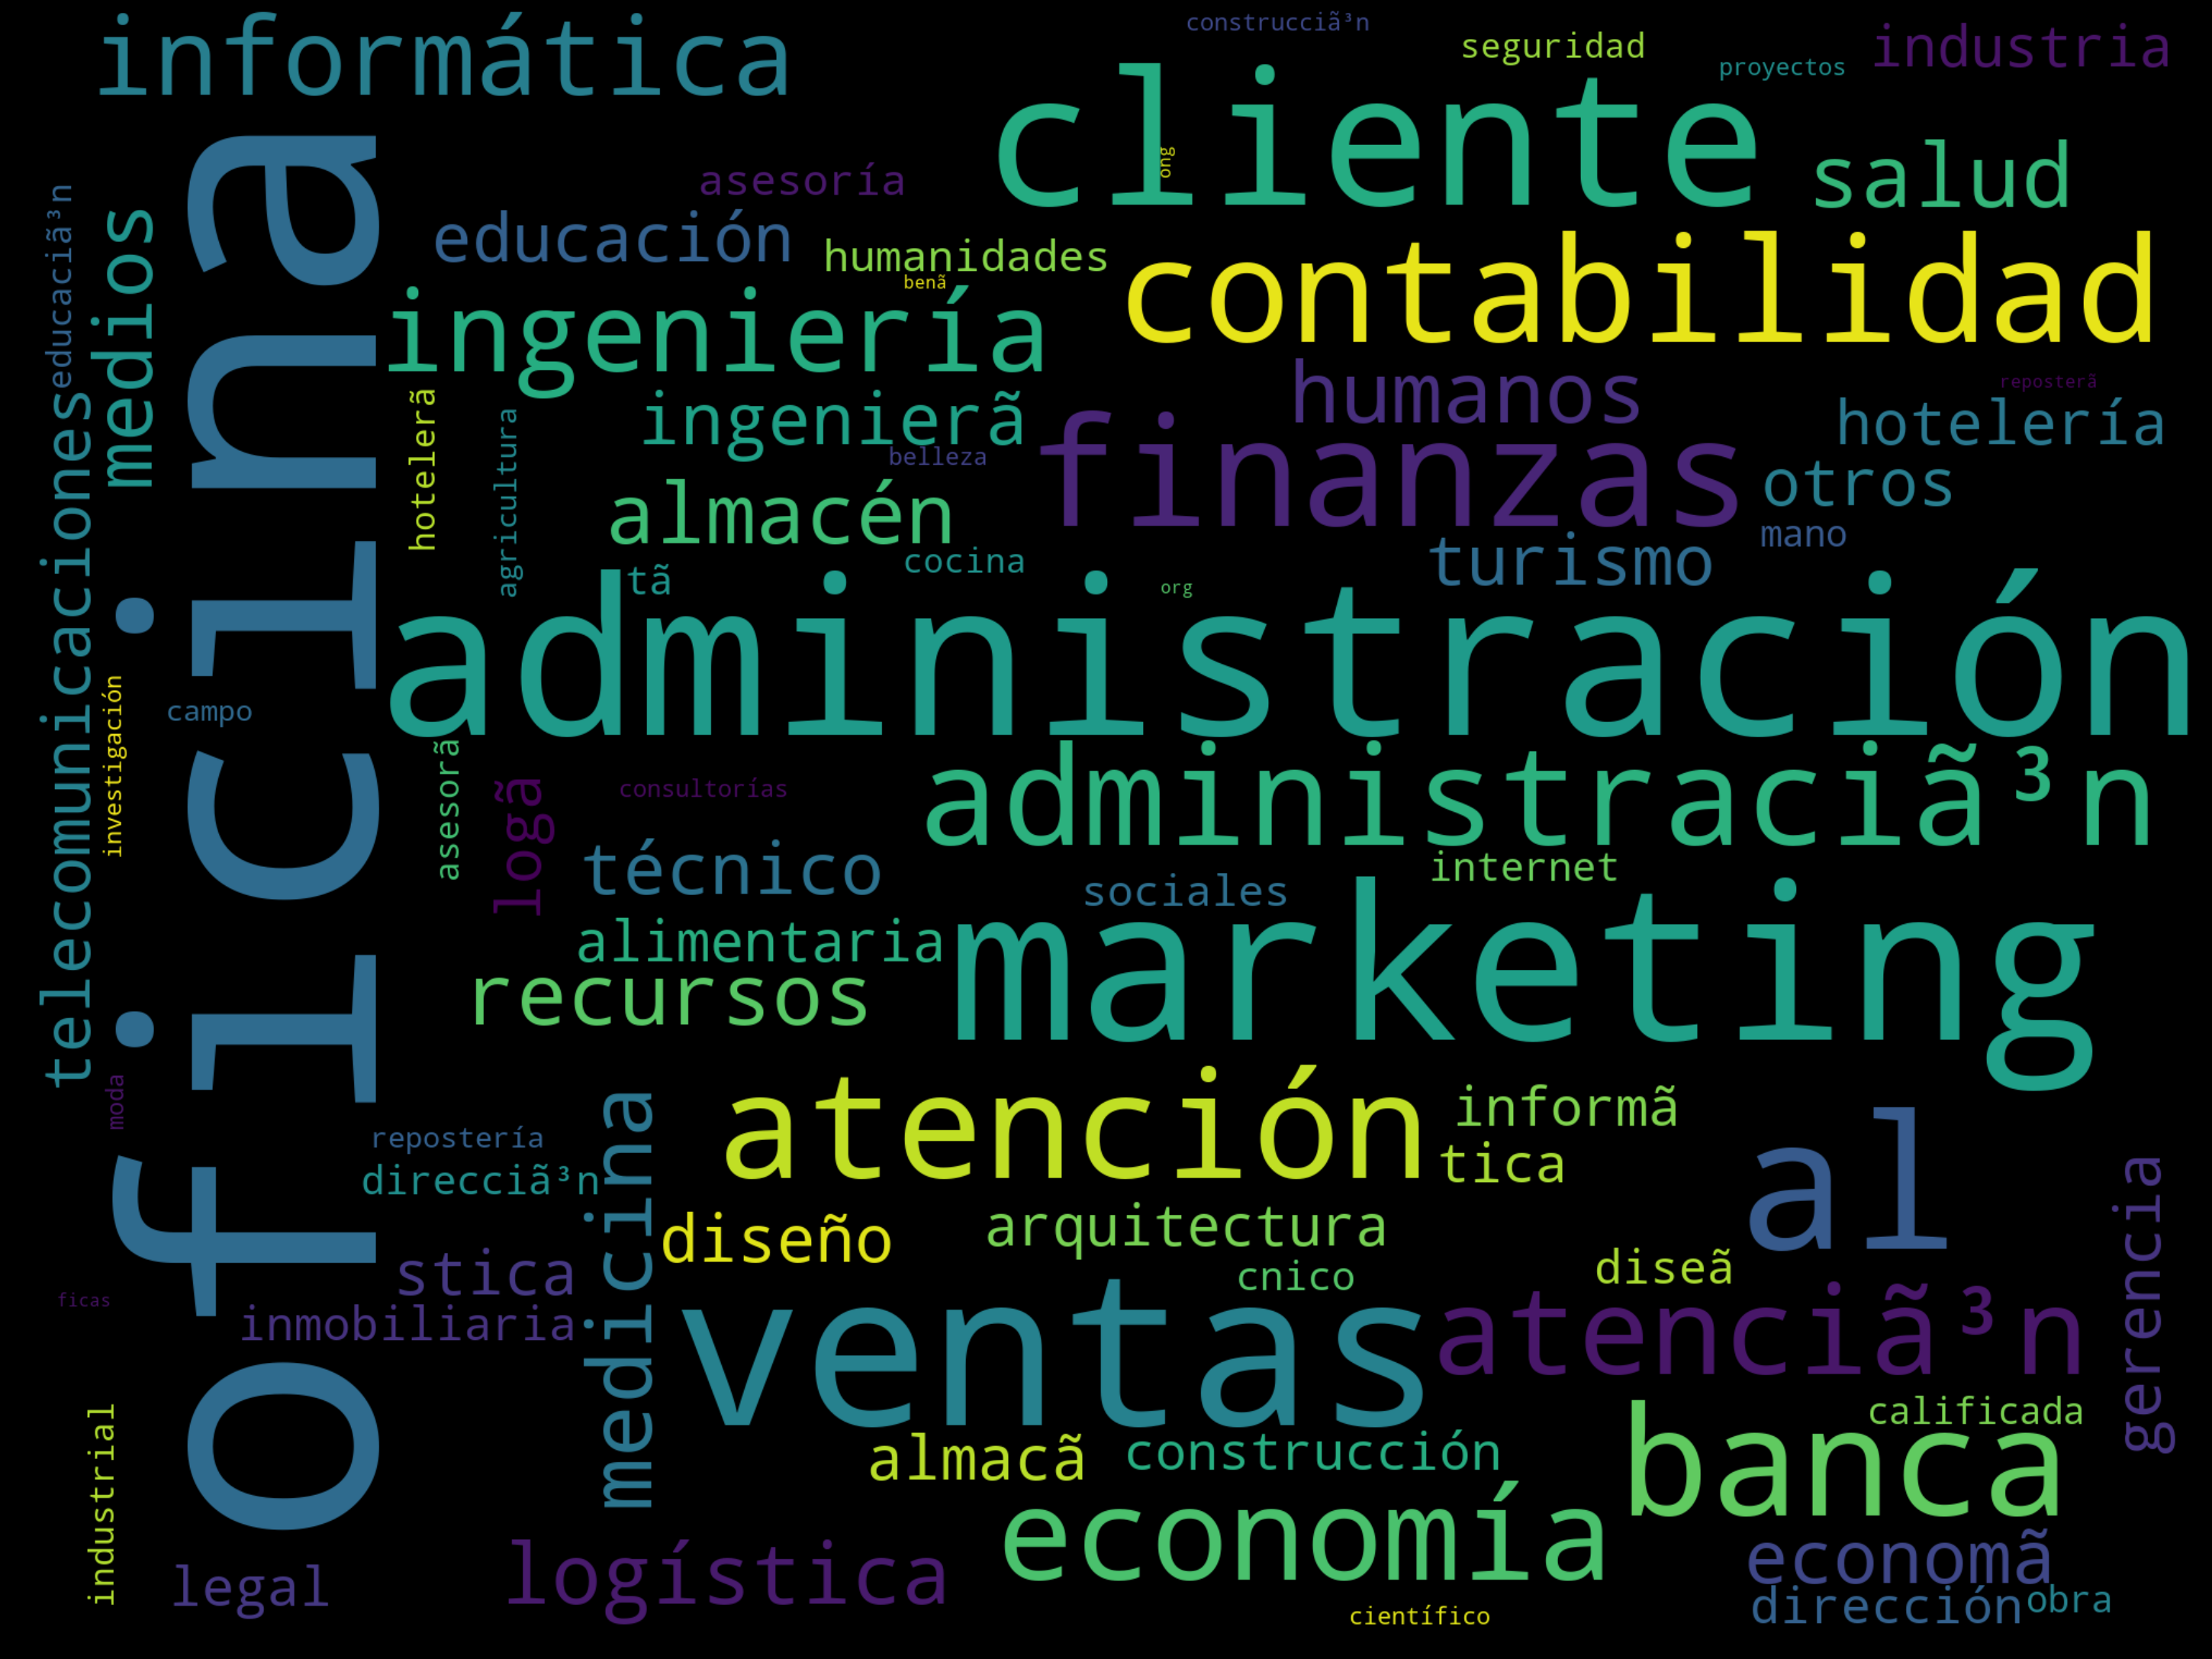

In [45]:
wordcloud = WordCloud(
    collocations=False,
    width = 2000,
    height = 1500,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(clean_text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [46]:
nombres_cargos = column2text(df_new['Nombre_cargo'])

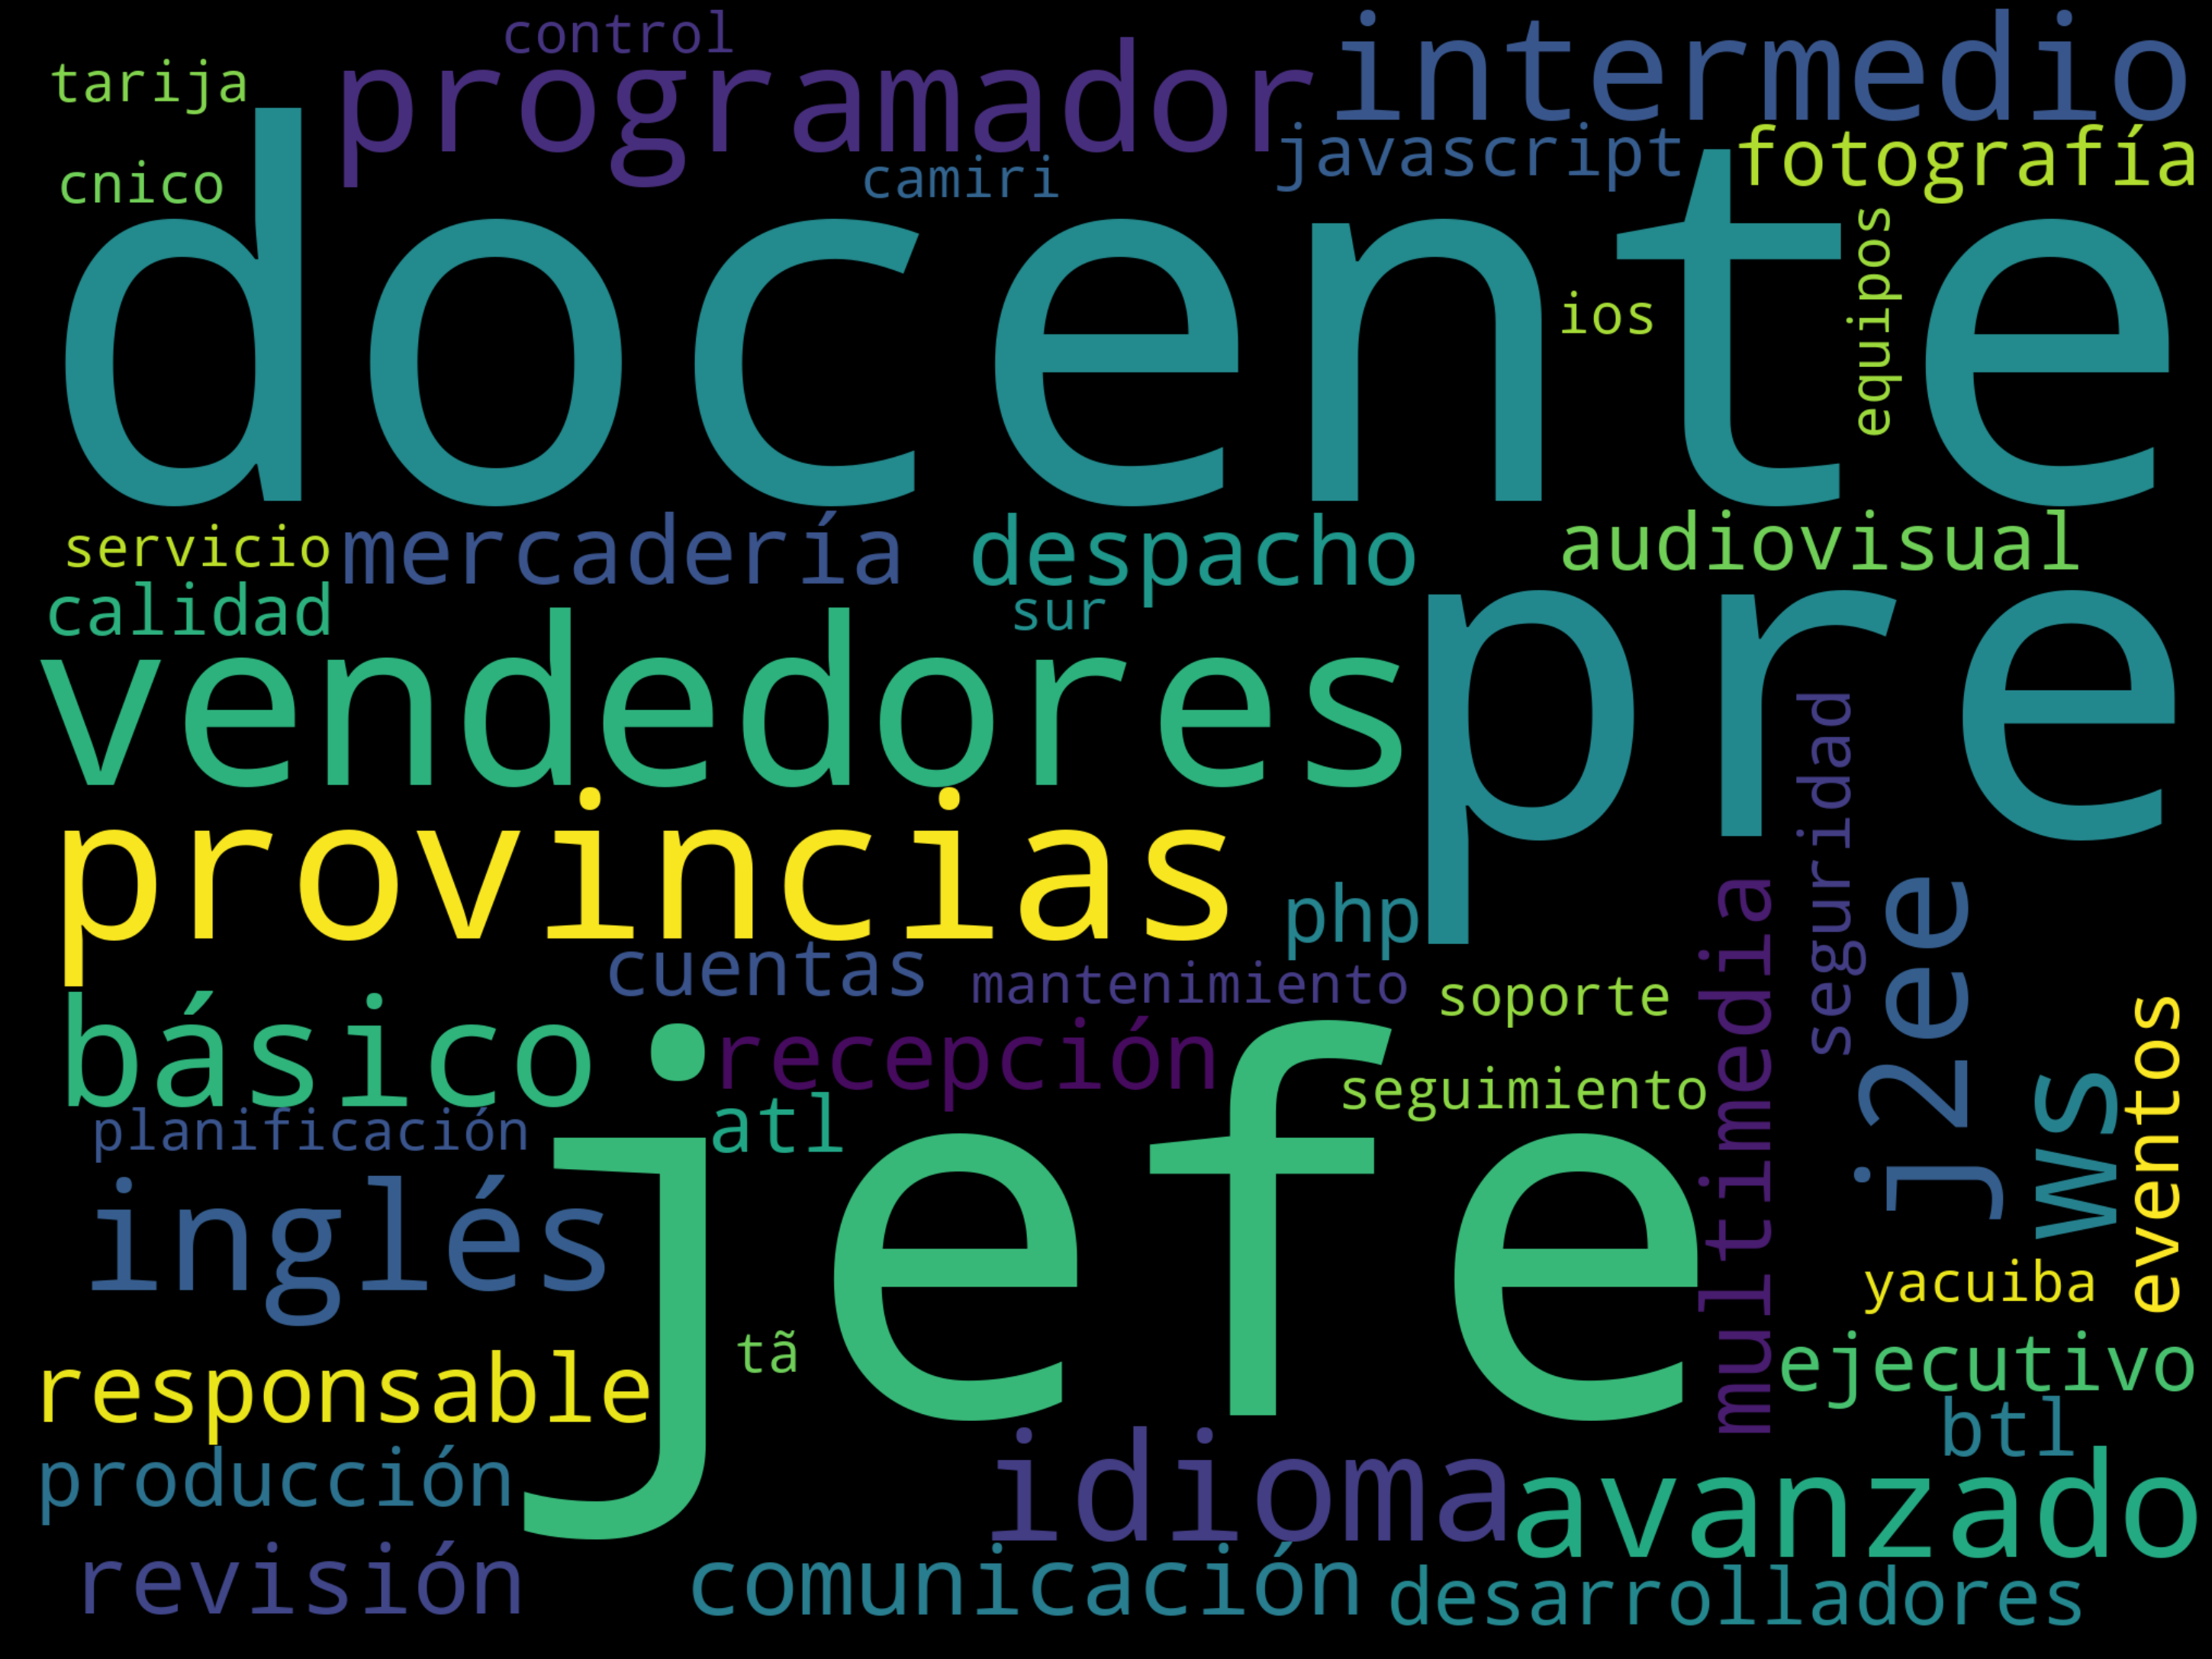

In [47]:
#set the stopwords list
stopwords= set(STOPWORDS)

#append new words to the stopwords list
new_words = {'de', 'al', 'santa', 'cruz', 'cochabamba', 'la', 'paz'}
new_stopwords=stopwords.union(new_words)

wordcloud = WordCloud(
    collocations=False,
    width = 2000,
    height = 1500,
    background_color = 'black',
    stopwords = new_stopwords).generate(str(nombres_cargos))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

ver qué dias publican más publicidad?
en qué mes?
de los informaticos, cuantos son en banca?
eliminar stopwords espanol

If informatica:
    descripcion = 
    wordCloud(descripcion)